# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


#Saving date in format to use for charts
Label_date = datetime.date(datetime.now())

# Output File (CSV)
output_data_file = "Output/city_data_" + str(Label_date) + ".csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#Insert the list of city names into a dataframe for easy storage and calculations
city_df = pd.DataFrame(cities, columns =['City'])

#add columns to the dataframe
city_df['Date_Updated'] = ""
city_df['Country'] = ""
city_df['Latitude'] = ""
city_df['Longitude'] = ""
city_df['Temperature_Max'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness'] = ""
city_df['Wind_Speed'] = ""

city_df.head()

,City,Date_Updated,Country,Latitude,Longitude,Temperature_Max,Humidity,Cloudiness,Wind_Speed
0,basco,,,,,,,,
1,sorvag,,,,,,,,
2,atbasar,,,,,,,,
3,souillac,,,,,,,,
4,kruisfontein,,,,,,,,


In [24]:
# This section will cycle through the city names in the dataframe and pull the required fields from the jason to populate the information
# if the city does not exist or errors, it will skip the city name and move to the next.

# set required variables that will be used in the below loop to call the api in json format
# uses imperial system of measurement
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
row_count = 0
total_count = len(city_df.index)

print("Beginning Data Retrieval")
print("-----------------------------")

for index,row in city_df.iterrows():
    row_count = row_count + 1
    city_name = city_df.loc[index, 'City']
    print(f"Processing Record {row_count} of {total_count} | {city_name}")
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city_name}"
    response = requests.get(query_url).json()
    try:
        city_df.loc[index, 'Date_Updated'] = datetime.date(datetime.now())
        city_df.loc[index, 'Country'] = response['sys']['country']
        city_df.loc[index, 'Latitude'] = response['coord']['lat']
        city_df.loc[index, 'Longitude']  = response['coord']['lon']
        city_df.loc[index, 'Temperature_Max']  = response['main']['temp_max']
        city_df.loc[index, 'Humidity']  = response['main']['humidity']
        city_df.loc[index, 'Cloudiness']  = response['clouds']['all']
        city_df.loc[index, 'Wind_Speed']  = response['wind']['speed']
    except:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 619 | basco
Processing Record 2 of 619 | sorvag
City not found. Skipping...
Processing Record 3 of 619 | atbasar
Processing Record 4 of 619 | souillac
Processing Record 5 of 619 | kruisfontein
Processing Record 6 of 619 | batemans bay
Processing Record 7 of 619 | oktyabrskoye
Processing Record 8 of 619 | bengkulu
Processing Record 9 of 619 | talnakh
Processing Record 10 of 619 | vigeland
Processing Record 11 of 619 | gualaquiza
Processing Record 12 of 619 | mikhaylovka
Processing Record 13 of 619 | arraial do cabo
Processing Record 14 of 619 | chabahar
Processing Record 15 of 619 | kiyasovo
Processing Record 16 of 619 | kapaa
Processing Record 17 of 619 | chokurdakh
Processing Record 18 of 619 | hithadhoo
Processing Record 19 of 619 | mataura
Processing Record 20 of 619 | barra da estiva
Processing Record 21 of 619 | grand gaube
Processing Record 22 of 619 | rikitea
Processing Record 23 of 619 | ushuaia
Proce

Processing Record 193 of 619 | lyubech
Processing Record 194 of 619 | aykhal
Processing Record 195 of 619 | youghal
Processing Record 196 of 619 | port alfred
Processing Record 197 of 619 | araouane
Processing Record 198 of 619 | laguna
Processing Record 199 of 619 | lubango
Processing Record 200 of 619 | sahuaripa
Processing Record 201 of 619 | puerto madryn
Processing Record 202 of 619 | saint anthony
Processing Record 203 of 619 | presidencia roque saenz pena
Processing Record 204 of 619 | porbandar
Processing Record 205 of 619 | cao bang
Processing Record 206 of 619 | nikolskoye
Processing Record 207 of 619 | lazaro cardenas
Processing Record 208 of 619 | saint-louis
Processing Record 209 of 619 | cadillac
Processing Record 210 of 619 | ornskoldsvik
Processing Record 211 of 619 | vila franca do campo
Processing Record 212 of 619 | severo-kurilsk
Processing Record 213 of 619 | panji
Processing Record 214 of 619 | hobyo
Processing Record 215 of 619 | batagay
Processing Record 216 of 

Processing Record 388 of 619 | quartucciu
Processing Record 389 of 619 | kerman
Processing Record 390 of 619 | tura
Processing Record 391 of 619 | san patricio
Processing Record 392 of 619 | iskitim
Processing Record 393 of 619 | mount gambier
Processing Record 394 of 619 | porto santo
Processing Record 395 of 619 | baculin
Processing Record 396 of 619 | palmer
Processing Record 397 of 619 | iqaluit
Processing Record 398 of 619 | verkhnyaya inta
Processing Record 399 of 619 | mattru
Processing Record 400 of 619 | makat
Processing Record 401 of 619 | la rioja
Processing Record 402 of 619 | javanrud
Processing Record 403 of 619 | gandiangan
City not found. Skipping...
Processing Record 404 of 619 | vila velha
Processing Record 405 of 619 | byron bay
Processing Record 406 of 619 | matara
Processing Record 407 of 619 | codrington
Processing Record 408 of 619 | dzhusaly
City not found. Skipping...
Processing Record 409 of 619 | majene
Processing Record 410 of 619 | bagdarin
Processing Recor

Processing Record 582 of 619 | gizo
Processing Record 583 of 619 | vardo
Processing Record 584 of 619 | cherskiy
Processing Record 585 of 619 | valparaiso
Processing Record 586 of 619 | alotau
City not found. Skipping...
Processing Record 587 of 619 | charters towers
Processing Record 588 of 619 | yar-sale
Processing Record 589 of 619 | synya
Processing Record 590 of 619 | port hedland
Processing Record 591 of 619 | namibe
Processing Record 592 of 619 | kerema
Processing Record 593 of 619 | tromso
Processing Record 594 of 619 | sept-iles
Processing Record 595 of 619 | ixtapa
Processing Record 596 of 619 | zakamensk
Processing Record 597 of 619 | miandrivazo
Processing Record 598 of 619 | shubarkuduk
Processing Record 599 of 619 | galle
Processing Record 600 of 619 | baneh
Processing Record 601 of 619 | farliug
Processing Record 602 of 619 | yinchuan
Processing Record 603 of 619 | nakhon phanom
Processing Record 604 of 619 | mahibadhoo
Processing Record 605 of 619 | devils lake
Processi

In [25]:
# Remove NA columns from the dataframe where and provid information to how many were removed
# I couldn't get dropna to work with the results from Openweather, so I did this instead
city_df = city_df.loc[city_df['Latitude'] != '']
new_count = len(city_df.index)
removed_count = total_count - new_count

print(f"{removed_count} cities were droped due to non-reponse from open weather.")

city_df.reset_index()
city_df.to_csv(output_data_file, index=False, header=True)

43 cities were droped due to non-reponse from open weather.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# This was done prior to analysis and adding data - I can recode if needed, but seems unneeded

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

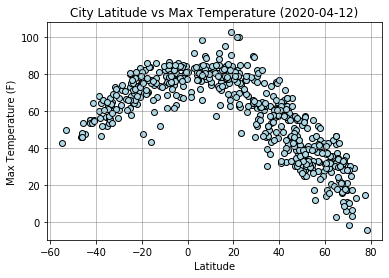

In [26]:
# The below chart compares the global latitude of a city with the 
# maximum temperature for that city on the selected date. It shows that 
# as the closer to the equator the city is located the higher the temperature. 
plt.title("City Latitude vs Max Temperature (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)


plt.scatter(city_df["Latitude"],city_df["Temperature_Max"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Temp_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Humidity Plot

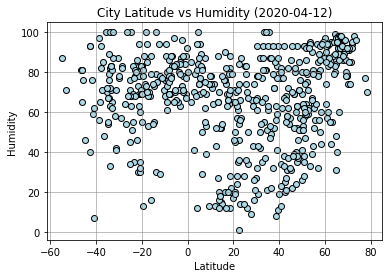

In [27]:
# The below chart compares the global latitude of a city with the 
# humidity for that city on the selected date. While there is loose correlation
# the data showing the highest humidity is clustered  in far north countries.
plt.title("City Latitude vs Humidity (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Humidity", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_df["Latitude"],city_df["Humidity"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Humidity_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Cloudiness Plot

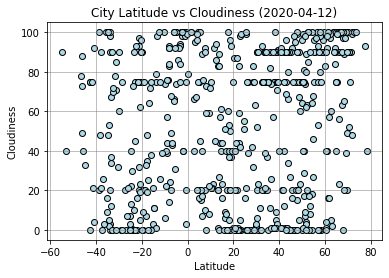

In [28]:
# The below chart compares the global latitude of a city with the 
# cloudiness for that city on the selected date. There is almost no coorelation
# between latitude and cloudiness shown in the data. 
plt.title("City Latitude vs Cloudiness (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_df["Latitude"],city_df["Cloudiness"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Cloud_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Wind Speed Plot

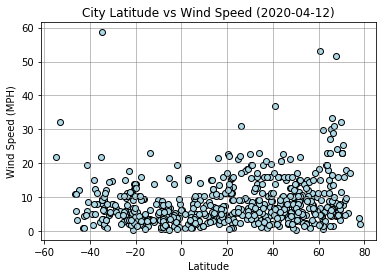

In [29]:
# The below chart compares the global latitude of a city with the 
# Wind Speed in the city on the selected date. As with cloudiness the data shows 
# almost no coorelation between latitude and wind speed. 
plt.title("City Latitude vs Wind Speed (" + str(Label_date) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Wind Speed (MPH)", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_df["Latitude"],city_df["Wind_Speed"], color='lightblue',edgecolor='black')
chart_output = "Output/Lat_Wind_" + str(Label_date) + ".png"
plt.savefig(chart_output)
plt.show()

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots
def liner_reg_plot(x, y, title, hemi):
    
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    #chart_title = {hemi} + "/n" + "City Latitude vs {title} (" + {Label_date} + ")"
    #plt.figure(figsize = (10,4))
    print(f"The r-squared is: {rvalue}")
    plt.title(f"{hemi}  City Latitude vs {title}", fontsize=12, wrap=True)
    plt.xlabel("Latitude", fontsize=10)
    plt.ylabel(f"{title}", fontsize=10)  
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x)+10,min(y)+10),fontsize=15,color="red")
    plt.grid(color='gray', linestyle='-', linewidth=.5)
    plt.scatter(x,y, color='lightblue',edgecolor='black')
    plt.show()
    
    #return (line_eq, regress_values)

In [31]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df['Latitude'] > 0] 
south_df = city_df.loc[city_df['Latitude'] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8894389520666645


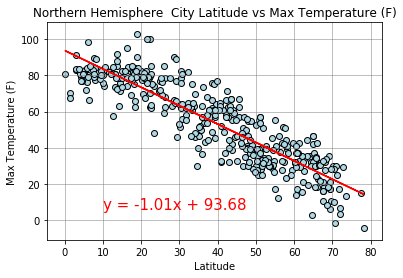

In [32]:
x = north_df["Latitude"]
y = north_df["Temperature_Max"]
title = "Max Temperature (F)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7370673317496015


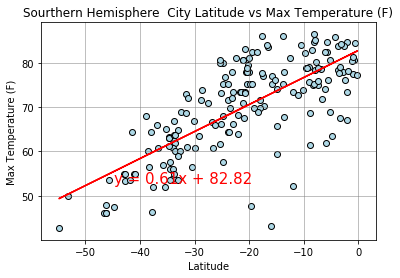

In [33]:
x = south_df["Latitude"]
y = south_df["Temperature_Max"]
title = "Max Temperature (F)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32218626605103867


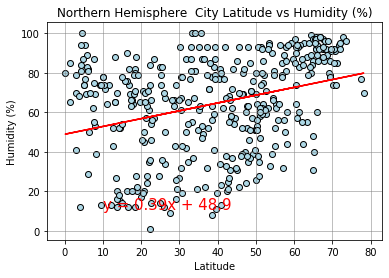

In [34]:
x = north_df["Latitude"]
y = north_df["Humidity"]
title = "Humidity (%)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11797466872949561


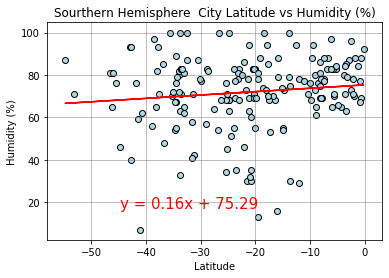

In [35]:
x = south_df["Latitude"]
y = south_df["Humidity"]
title = "Humidity (%)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2715457246072052


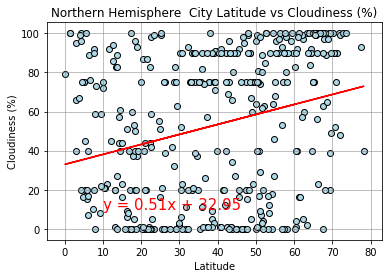

In [36]:
x = north_df["Latitude"]
y = north_df["Cloudiness"]
title = "Cloudiness (%)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21103079560711305


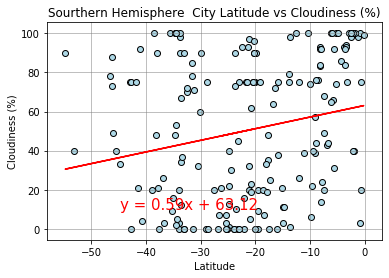

In [37]:
x = south_df["Latitude"]
y = south_df["Cloudiness"]
title = "Cloudiness (%)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20254207426409754


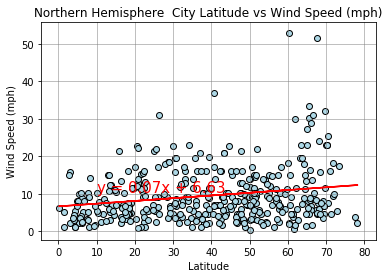

In [38]:
x = north_df["Latitude"]
y = north_df["Wind_Speed"]
title = "Wind Speed (mph)"
hemi = 'Northern Hemisphere'

liner_reg_plot(x,y,title,hemi)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.273958449432212


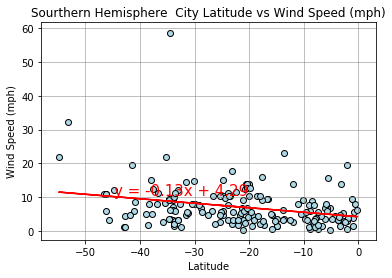

In [39]:
x = south_df["Latitude"]
y = south_df["Wind_Speed"]
title = "Wind Speed (mph)"
hemi = 'Sourthern Hemisphere'

liner_reg_plot(x,y,title, hemi)